## Plan

1. read Arabic Wordnet words from NLTK module.
2. preprocess and clean words.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import re

In [1]:
# Add higher directory to python modules path.

import sys
sys.path.append("..")

In [2]:
from utilities import arabic_nlp_utils

Unit test of normalize_arabic_text_*

Raw text:
 بِسْمِ اللهِ الرَّحْمٰنِ الرَّحِيمِ . ؤ ئ إ أ ٱ آ واسى في .جـــمـــيـــل .مواڞفات وسعر هاتف أيفون 8  ڞ الجديد
After replacing non-Arabic letters with space:
 ب س م  الله  الر  ح م ن  الر  ح يم    ؤ ئ إ أ   آ واسى في  جـــمـــيـــل  موا فات وسعر هاتف أيفون      الجديد
After removing tatweel and diacritics:
 ب س م  الله  الر  ح م ن  الر  ح يم    ؤ ئ إ أ   آ واسى في  جميل  موا فات وسعر هاتف أيفون      الجديد
After orthographic letter normalization:
 ب س م  اللة  الر  ح م ن  الر  ح يم    ء ء ا ا   ا واسي في  جميل  موا فات وسعر ةاتف ايفون      الجديد


## Load Arabic words from wordnet (AWN)

In [4]:
from nltk.corpus import wordnet as wn

In [5]:
arabic_WN_words = wn.all_lemma_names(lang='arb')
print(type(arabic_WN_words),len(arabic_WN_words))
assert(len(arabic_WN_words)==len(set(arabic_WN_words)))

<class 'list'> 17785


In [6]:
print(arabic_WN_words[0:10])

['مُبارزة', 'قاطِع', 'رسْمِيّ', 'اِسْتعْمل', 'اِبْتدع', 'مُدِير_إِدارِي', 'نُقْطة_طُوبُوغْرافِيّة', 'حِكَايَة_رَمْزِيَّة', 'مالطة', 'رقابة']


In [7]:
# multi-word expressions: that contain '_'
u = [x.split('_') for x in arabic_WN_words]
len(u)

17785

In [8]:
u[0:10]

[['مُبارزة'],
 ['قاطِع'],
 ['رسْمِيّ'],
 ['اِسْتعْمل'],
 ['اِبْتدع'],
 ['مُدِير', 'إِدارِي'],
 ['نُقْطة', 'طُوبُوغْرافِيّة'],
 ['حِكَايَة', 'رَمْزِيَّة'],
 ['مالطة'],
 ['رقابة']]

### Quick custom cleanup of corpus

- separate multi-word expressions
- remove duplicate words

In [9]:
# separate multi-word expressions into single words

arabic_WN_words_flat = [word for x in arabic_WN_words for word in x.split('_')]
assert(type(arabic_WN_words_flat)==list and type(arabic_WN_words_flat[0])==str)

arabic_WN_words_flat[0:10]

['مُبارزة',
 'قاطِع',
 'رسْمِيّ',
 'اِسْتعْمل',
 'اِبْتدع',
 'مُدِير',
 'إِدارِي',
 'نُقْطة',
 'طُوبُوغْرافِيّة',
 'حِكَايَة']

In [10]:
# number of duplicate words after flattening

len(arabic_WN_words_flat),len(set(arabic_WN_words_flat)),len(arabic_WN_words_flat)-len(set(arabic_WN_words_flat))

(25534, 17132, 8402)

In [11]:
# Normalize words

arabic_WN_words_norm = [arabic_nlp_utils.normalize_arabic_text_1(word) for word in arabic_WN_words_flat]

In [12]:
# Number of duplicate normalized words

len(arabic_WN_words_norm), len(set(arabic_WN_words_norm)), len(arabic_WN_words_norm)-len(set(arabic_WN_words_norm))

(25534, 12482, 13052)

In [13]:
pd.Series(arabic_WN_words_norm).value_counts().head(10)

في         207
على        172
من         141
ب           92
إلى         89
وحدة        87
عن          83
غير         68
جمهورية     63
عمل         50
dtype: int64

In [14]:
# put distinct normalized words in a data frame for convenience

wn_words_df = pd.DataFrame({'word':list(set(arabic_WN_words_norm))})
wn_words_df.head()

,word
0,إستعد
1,
2,الإنتخابات
3,نيروبي
4,الصفة


In [18]:
wn_words_df['nb_non_arabic_letters'] = wn_words_df.word.map(lambda x: len(re.findall(arabic_nlp_utils.NON_ARABIC_CHARS_REGEX,x)))
wn_words_df['word_len'] = wn_words_df.word.map(len)
wn_words_df = wn_words_df.set_index('word')

print(wn_words_df.shape)
wn_words_df.head()

(12482, 2)


,nb_non_arabic_letters,word_len
word,,
إستعد,0,5
,0,0
الإنتخابات,0,10
نيروبي,0,6
الصفة,0,5


#### Distribution of word length

In [19]:
wn_words_df.word_len.describe()

count    12482.000000
mean         4.830957
std          1.507647
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         25.000000
Name: word_len, dtype: float64

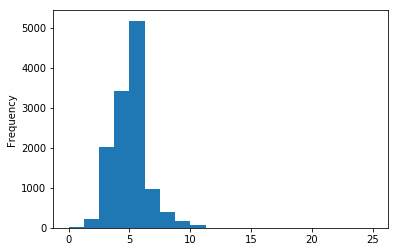

In [20]:
wn_words_df.word_len.plot.hist(bins=20)

#### One-letter words

In [21]:
# number of empty and one letter words
(wn_words_df.word_len<=1).sum()

21

In [22]:
# one-letter words
wn_words_df.index[wn_words_df.word_len==1]

Index(['و', '=', 'ج', 'م', '2', '-', 'ق', 'S', 'I', 'ت', 'ش', 'ل', 'ب', '6',
       'غ', 'أ', 'ه', 'ح', 'ا', 'ك'],
      dtype='object', name='word')

#### Two-letter words

In [23]:
(wn_words_df.word_len==2).sum()

209

In [24]:
wn_words_df.index[wn_words_df.word_len==2].tolist()

['جو',
 'ضد',
 'مك',
 'ذل',
 'ما',
 'رق',
 'طل',
 'خث',
 'سم',
 'فخ',
 'HN',
 'شب',
 'حق',
 'كم',
 'حي',
 'لإ',
 'عس',
 'أس',
 'غم',
 'رش',
 'عث',
 'شم',
 'كل',
 'هب',
 'قص',
 'جس',
 'بي',
 'ذم',
 'حظ',
 'رد',
 'لص',
 'حس',
 'قر',
 'كف',
 'ضر',
 'ند',
 'طن',
 'غد',
 'مس',
 'له',
 'رن',
 'مل',
 'نط',
 'صب',
 'حد',
 'ني',
 'مط',
 'شن',
 'ذر',
 'زي',
 'إن',
 'رذ',
 'تم',
 'يخ',
 'بر',
 'حن',
 'عش',
 'دن',
 '53',
 'فر',
 'زل',
 'خض',
 'كي',
 'ضل',
 'دق',
 'فو',
 'دس',
 'عن',
 'شط',
 'ذو',
 'خط',
 'رض',
 'هو',
 'لم',
 'بط',
 'حت',
 'حض',
 'حب',
 'نص',
 'لا',
 'بن',
 'لغ',
 'غل',
 'تل',
 'أو',
 'eV',
 'آب',
 'من',
 '16',
 'غط',
 'دم',
 'قش',
 'جص',
 'خف',
 'فم',
 'ري',
 'زج',
 'نح',
 'رث',
 'أخ',
 'أز',
 'سد',
 'رم',
 'هر',
 'جا',
 'ضم',
 'قض',
 'ات',
 'صن',
 'دل',
 'بس',
 'صر',
 'نز',
 'كج',
 'حز',
 'فض',
 'صد',
 'شل',
 'جف',
 'فى',
 'به',
 'خص',
 'شد',
 'ذا',
 'Pb',
 'ثر',
 'بز',
 'يد',
 'تك',
 'بث',
 'عى',
 'في',
 'عم',
 'مر',
 'شع',
 'رص',
 'رف',
 'سر',
 'قس',
 'شئ',
 'أب',
 'تي',
 'فئ',

#### Three-letter words

In [25]:
(wn_words_df.word_len==3).sum()

2020

In [26]:
wn_words_df.index[wn_words_df.word_len==3].tolist()

['هاج',
 'طرد',
 'خزف',
 'غنى',
 'وفر',
 'طحن',
 'كمل',
 'شيد',
 'طرب',
 'نصب',
 'بنت',
 'أحك',
 'نجز',
 'حكى',
 'سري',
 'كظم',
 'سلخ',
 'غاص',
 'هول',
 'ربع',
 'بلغ',
 'ملف',
 'رمى',
 'فاض',
 'مقت',
 'لمح',
 'شكا',
 'لبي',
 'عفو',
 'خرم',
 'مرق',
 'شكى',
 'منه',
 'غصب',
 'عظم',
 'بضع',
 'مكس',
 'صدر',
 'طبي',
 'أوى',
 'جلق',
 'ذرة',
 'لفط',
 'صدى',
 'عدا',
 'قرض',
 'وضب',
 'بله',
 'داس',
 'جبى',
 'زجر',
 'قنص',
 'شبع',
 'شرف',
 'نعت',
 'زنى',
 'بوش',
 'ظمأ',
 'نهق',
 'ولد',
 'كدر',
 'عيش',
 'لوث',
 'فأر',
 'نعس',
 'صعف',
 'حلة',
 'نحت',
 'غرق',
 'وقت',
 'قنع',
 'قفز',
 'أرض',
 'ملس',
 'كثب',
 'تاه',
 'نعب',
 'عتق',
 'قار',
 'زلة',
 'قسم',
 'عسف',
 'فهم',
 'الب',
 'محك',
 'راح',
 'نبي',
 'مسك',
 'على',
 'بطة',
 'مسح',
 'أصم',
 'ندم',
 'لون',
 'نفى',
 'رفق',
 'نقع',
 'خاط',
 'همج',
 'شرب',
 'نضح',
 'طوع',
 'صعب',
 'وعي',
 'حشد',
 'خزن',
 'سمر',
 'نحب',
 'قال',
 'صاد',
 'كمش',
 'تبل',
 'مال',
 'فوج',
 'شرق',
 'جبر',
 'غلط',
 'شرع',
 'طية',
 'مؤذ',
 'خرص',
 'شأن',
 'بصق',
 'ضبط',
 'برم',


#### Very long words

In [27]:
# number of long words
(wn_words_df.word_len>12).sum()

4

In [28]:
# very long words
wn_words_df[wn_words_df.word_len>12]

,nb_non_arabic_letters,word_len
word,,
ثايروغلوبولين,0,13
كروماتوغرافيا,0,13
إيزوثيوسيانات,0,13
3.14159265358979323846...,25,25


#### Words that contain non-Arabic letters

In [29]:
# number of words that contain non-Arabic letters
(wn_words_df.nb_non_arabic_letters>=1).sum()

35

In [30]:
wn_words_df[wn_words_df.nb_non_arabic_letters>=1]

,nb_non_arabic_letters,word_len
word,,
HN,2,2
الطير-,1,6
اﻷخلاقية,1,8
=,1,1
TNT,3,3
2,1,1
ٱلسعودية,1,8
جد?يد,1,5
NSAID,5,5


#### Remove unwanted words

In [31]:
# remove one-letter words and/or containing non-arabic letters

print(wn_words_df.shape)
wn_words_df_clean = wn_words_df[(wn_words_df.word_len>1) & (wn_words_df.nb_non_arabic_letters==0)]
wn_words_df_clean = wn_words_df_clean.drop('nb_non_arabic_letters',axis=1)
print(wn_words_df_clean.shape)

(12482, 2)
(12432, 1)


In [32]:
wn_words_df_clean.head()

,word_len
word,
إستعد,5
الإنتخابات,10
نيروبي,6
الصفة,5
مالطة,5


In [33]:
## Store word list in a file

filename = '../../generated_data/AWN_words.csv'
my_list = wn_words_df_clean.index.tolist()
assert(len(my_list)==len(set(my_list)))

with open(filename, "w", encoding='utf8') as textfile:
    for w in my_list:
        textfile.write(str(w) + ",MSA" + "\n")

In [35]:
assert(len(my_list)==len(set(my_list)))